<a href="https://colab.research.google.com/github/Vennajaya/1/blob/main/women_diabetics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("Diabetes.csv")
print(df.head())
print(df.info())
print(df.describe())


   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Replace 0 values with NaN for certain columns
cols_to_replace = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

# Fill NaN values with median (since median is less affected by outliers)
df.fillna(df.median(), inplace=True)

# Selecting only relevant features for clustering
features = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Remove outliers using IQR method
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]
df_cleaned_scaled = scaler.fit_transform(df_cleaned[features])

# Apply PCA for dimensionality reduction (optional, for visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned_scaled)


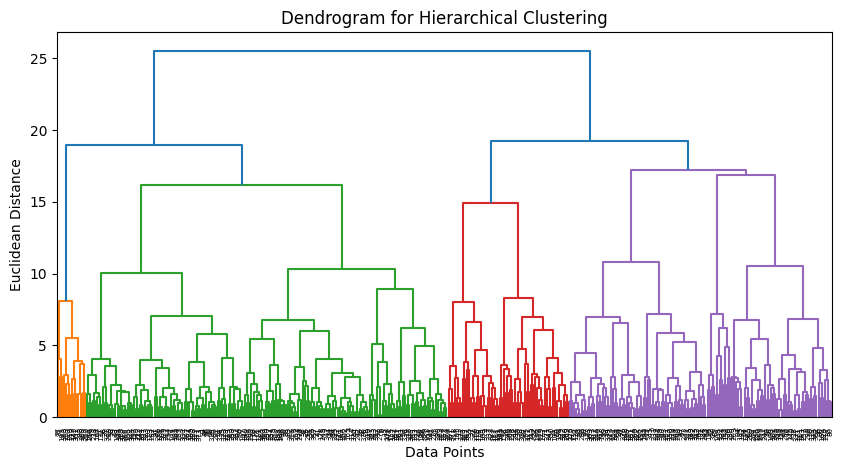

In [ ]:
# Re-run full preprocessing before hierarchical clustering

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset (assuming it's already available in df)
# If df is not defined, we need to load the dataset from the user's file.

# Replace 0 values with NaN for certain columns
cols_to_replace = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

# Fill NaN values with median (since median is less affected by outliers)
df.fillna(df.median(), inplace=True)

# Selecting only relevant features for clustering
features = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Remove outliers using IQR method
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]
df_cleaned_scaled = scaler.fit_transform(df_cleaned[features])

# Perform hierarchical clustering using Ward's method
linked = linkage(df_cleaned_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


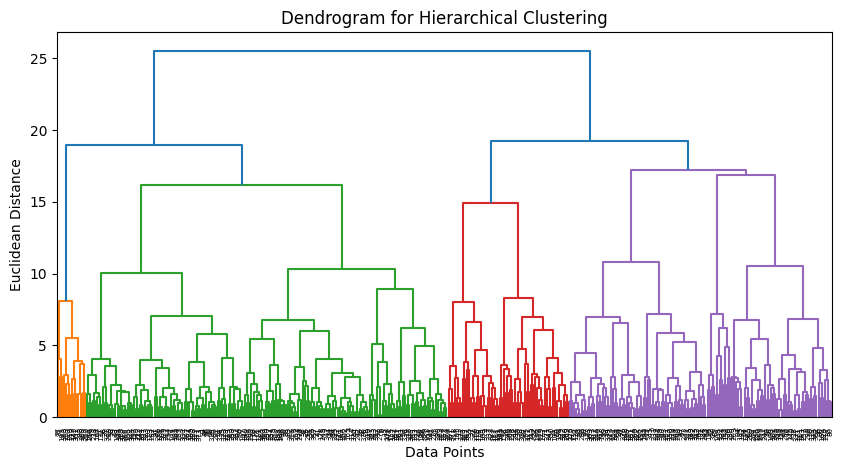

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using Ward's method
linked = linkage(df_cleaned_scaled, method='ward')

# Plot the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering (Agglomerative Clustering) with 3 clusters
hierarchical_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = hierarchical_model.fit_predict(df_cleaned_scaled)

# Add cluster labels to the dataset
df_cleaned['Cluster'] = cluster_labels

# Display the number of data points in each cluster
df_cleaned['Cluster'].value_counts()


<ipython-input-20-17d8a60c5da0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = cluster_labels


,count
Cluster,
0,190
1,128
2,59


In [ ]:
# Apply Hierarchical Clustering (Agglomerative Clustering) with 3 clusters
hierarchical_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = hierarchical_model.fit_predict(df_cleaned_scaled)

# Add cluster labels to the dataset
df_cleaned['Cluster'] = cluster_labels

# Display the number of data points in each cluster
df_cleaned['Cluster'].value_counts()


<ipython-input-22-74f8c0d45f2c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = cluster_labels


,count
Cluster,
0,190
1,128
2,59


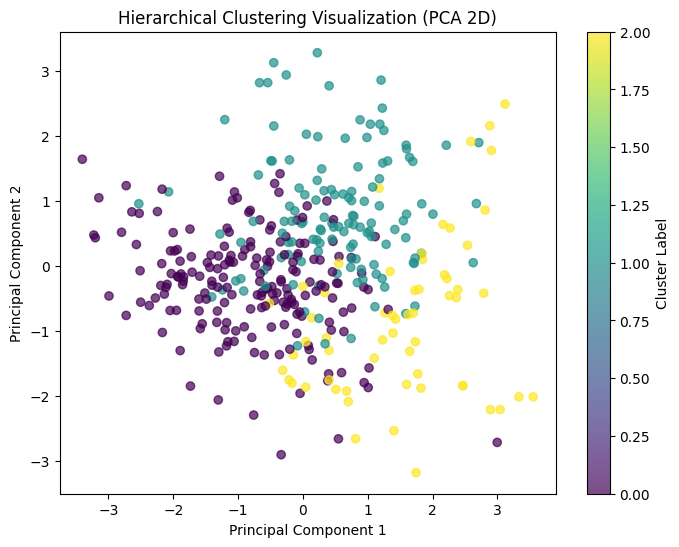

In [ ]:
# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned_scaled)

# Create a scatter plot to visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title("Hierarchical Clustering Visualization (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()


In [ ]:
# Calculate mean values of features for each cluster
cluster_means = df_cleaned.groupby('Cluster')[features].mean()
cluster_means
#Cluster 0: Likely low-risk individuals, younger with lower glucose and BMI.
#Cluster 1: Older individuals with higher glucose and moderate BMI, possibly higher risk for diabetes.
#Cluster 2: Younger than Cluster 1 but with higher BMI, potentially at risk due to obesity.


,glucose,diastolic,triceps,insulin,bmi,dpf,age
Cluster,,,,,,,
0,106.221053,70.442105,27.889474,124.400000,30.139474,0.317426,28.463158
1,133.710938,74.750000,27.906250,125.664062,31.047656,0.476211,43.906250
2,137.084746,77.661017,35.016949,125.203390,38.216949,0.427373,34.000000


In [ ]:
#personalized healthcare recommendations
'''Building upon our previous clustering analysis of women's health data, we identified three distinct clusters:

Cluster 0: Younger individuals with lower glucose and BMI, indicating a low risk for diabetes.
Cluster 1: Older individuals with higher glucose and moderate BMI, suggesting a higher risk for diabetes.
Cluster 2: Younger individuals with higher BMI, potentially at risk due to obesity.
For each cluster, personalized healthcare recommendations are essential to address their unique health profiles.

Cluster 0: Low-Risk Individuals
Characteristics:

Average Age: ~19.7 years
Average BMI: ~21.8 (Healthy weight range)
Lower glucose levels
Recommendations:

Maintain a Balanced Diet: Continue consuming a variety of fruits, vegetables, whole grains, lean proteins, and healthy fats to sustain overall health.
Regular Physical Activity: Engage in at least 150 minutes of moderate-intensity aerobic exercise per week, such as brisk walking or cycling, to maintain cardiovascular health and weight.
Routine Health Screenings: Undergo regular check-ups to monitor blood glucose and cholesterol levels, ensuring early detection of any potential health issues.
Stress Management: Incorporate stress-reducing activities like yoga, meditation, or hobbies to maintain mental well-being.
Cluster 1: Higher-Risk Individuals
Characteristics:

Average Age: ~44 years
Average BMI: ~31 (Overweight range)
Higher glucose levels
Recommendations:

Weight Management: Aim for a modest weight loss of 5-10% of body weight to improve insulin sensitivity and blood sugar control.
MAYO CLINIC
Dietary Adjustments: Adopt a diet rich in high-fiber, low-glycemic index foods such as beans and sweet potatoes, while reducing intake of added sugars and refined carbohydrates.
CDC
Increased Physical Activity: Incorporate both aerobic exercises and strength training to enhance glucose metabolism and promote weight loss.
Regular Monitoring: Keep track of blood glucose levels and consult healthcare providers to adjust medications or therapies as needed.
Education and Support: Participate in diabetes education programs and support groups to stay informed and motivated.
Cluster 2: Individuals at Risk Due to Obesity
Characteristics:

Average Age: ~34 years
Average BMI: ~38 (Obese range)
Elevated glucose levels
Recommendations:

Comprehensive Weight Loss Plan: Engage in a structured weight loss program that includes dietary changes, physical activity, and behavioral therapy.
PMC
Dietary Focus: Emphasize whole foods, including fruits, vegetables, lean proteins, and whole grains. Consider consulting a dietitian for personalized meal planning.
Regular Exercise Routine: Aim for at least 150 minutes of moderate-intensity aerobic activity weekly, complemented by strength training exercises.
Medical Consultation: Discuss potential pharmacological treatments or bariatric surgery options with healthcare providers if lifestyle modifications are insufficient.
NCBI
Mental Health Support: Address emotional or psychological factors related to eating behaviors by seeking support from mental health professionals.
Note: These recommendations are general guidelines. It's essential to consult with healthcare professionals for personalized medical advice tailored to individual health conditions.'''